In [1]:
import os

os.chdir("../..") # need to set path to repo root

In [2]:
from src.dataset import get_segmentation_df

segmentation_df = get_segmentation_df()
segmentation_df.head()
# can be multiple annotations per image, each one represents an individual card and its bounding box

,annotation_id,file_name,height,id,width,x0,x1,y0,y1,file_path
0,0,4125906001_1,837,0,500,50,450,225,795,./db/shared/front_scans/4125906001_1
1,0,0_4186041001,825,1,500,50,450,222,783,./db/shared/front_scans/0_4186041001
2,0,4125505001_1,798,2,500,50,450,215,758,./db/shared/front_scans/4125505001_1
3,0,4125762001_1,803,3,500,50,450,216,762,./db/shared/front_scans/4125762001_1
4,0,0_4185750001,825,4,500,50,450,222,783,./db/shared/front_scans/0_4185750001


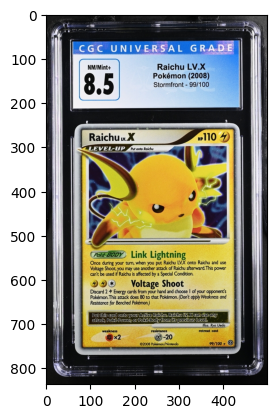

In [3]:
from src.image import display_image, ImageDatabase, ImageStorage

# disk storage wrapper for shared nested repository, acts as a "bucket"
front_scans_storage = ImageStorage("front_scans", db=ImageDatabase.SHARED)

# grab 0th annotation and display it
annotation_0 = segmentation_df.iloc[0]
img = front_scans_storage.get_image(annotation_0["file_name"])
display_image(img)

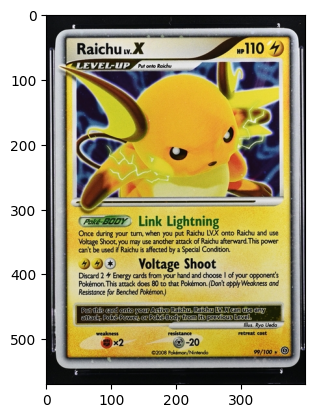

In [4]:
from src.image import crop_image_px

cropped_img = crop_image_px(img, top=annotation_0["y0"], bottom=annotation_0["y1"], left=annotation_0["x0"], right=annotation_0["x1"])
display_image(cropped_img)

In [6]:
other_scans_storage = ImageStorage("other_scans", db=ImageDatabase.SHARED)
other_scans_storage.size()

18